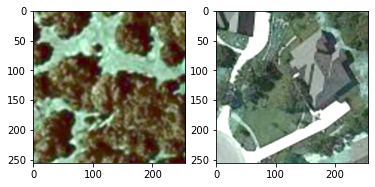

In [79]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import torch

transform = A.Compose(
        [
            A.RandomSizedCrop(min_max_height=(96, 256), height=256, width=256, p=0.875),
            A.Flip(p=0.5),
            A.RandomRotate90(p=0.5),
            A.OneOf([
            A.GaussNoise(p=1.0),
            A.ISONoise(p=1.0)
            ], p=0.5),
            A.OneOf([
                A.MedianBlur(blur_limit=3, p=1.0),
                A.Blur(blur_limit=3, p=1.0),
                A.CLAHE(p=1.0),
                A.Equalize(p=1.0),
            ], p=0.5),
            A.ColorJitter(0.4,0.4,0.4,0.4),
            
        ],
    additional_targets={'image0': 'image'}
)

img_prev = cv2.imread('/data/LEVIR-CD-256/A/train_12_7.png')
img_after = cv2.imread('/data/LEVIR-CD-256/B/train_12_7.png')
img_label = cv2.imread('/data/LEVIR-CD-256/label/train_12_7.png',0)

transformed = transform(image = img_prev, image0 = img_after, mask=img_label)
img_prev = transformed['image']
img_after = transformed['image0']
img_label = transformed['mask']

plt.subplot(1, 2, 1)
plt.imshow(img_prev)
plt.subplot(1, 2, 2)
plt.imshow(img_after)

#plt.imshow((img_label/255.0).to(torch.int64))

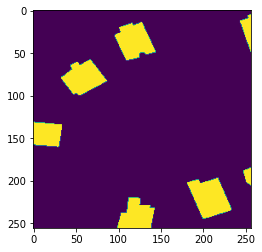

In [6]:
plt.imshow(img_label)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

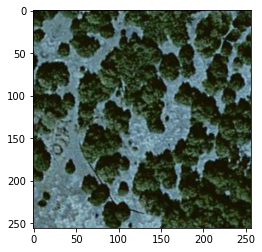

In [9]:
plt.imshow(img_prev)